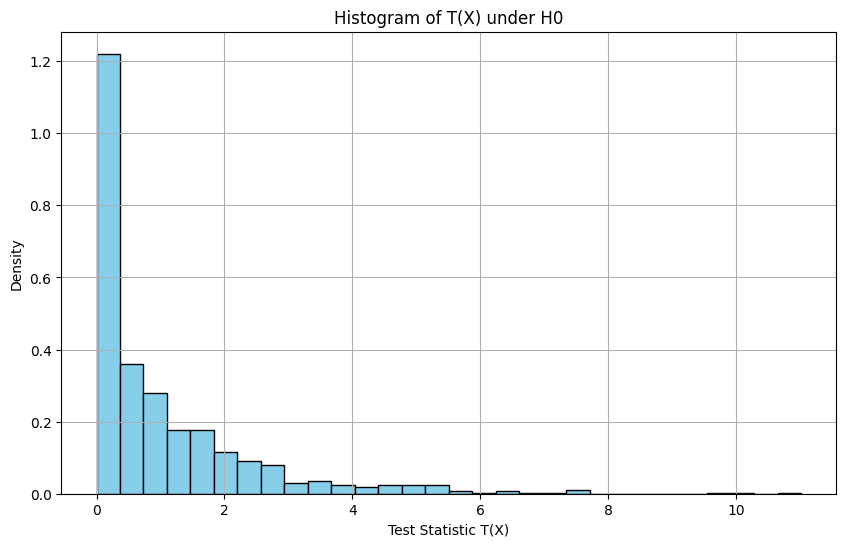

Numerical approximation of c_alpha: 3.9865
Analytical c_alpha from chi-squared distribution: 3.8415
Difference between numerical and analytical c_alpha: 0.1450


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(2024)

# Given parameters
theta_0 = 175
sigma_squared = 6
sigma = np.sqrt(sigma_squared)
n = 4
alpha = 0.05
M = 1000  # Number of simulations

# Initialize an array to store the test statistics
T_values = np.zeros(M)

# Simulation loop
for m in range(M):
    # Draw a sample under H0: theta = theta_0
    x_m = np.random.normal(theta_0, sigma, n)
    # Compute the sample mean
    x_bar_m = np.mean(x_m)
    # Compute the test statistic T(x^m)
    T_m = (n / sigma_squared) * (x_bar_m - theta_0) ** 2
    # Store the test statistic
    T_values[m] = T_m

# Plot the histogram of T_values
plt.figure(figsize=(10, 6))
plt.hist(T_values, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of T(X) under H0')
plt.xlabel('Test Statistic T(X)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Sort the test statistics and find the critical value c_alpha
T_values_sorted = np.sort(T_values)
c_alpha_index = int(np.ceil(M * (1 - alpha))) - 1  # Adjust for zero-based index
c_alpha = T_values_sorted[c_alpha_index]

print(f'Numerical approximation of c_alpha: {c_alpha:.4f}')

# Analytical critical value
from scipy.stats import chi2
c_alpha_analytical = chi2.ppf(1 - alpha, df=1)
print(f'Analytical c_alpha from chi-squared distribution: {c_alpha_analytical:.4f}')

# Compare the numerical and analytical critical values
difference = abs(c_alpha - c_alpha_analytical)
print(f'Difference between numerical and analytical c_alpha: {difference:.4f}')


Numerical Confidence Interval C(x): [167.30, 172.20]


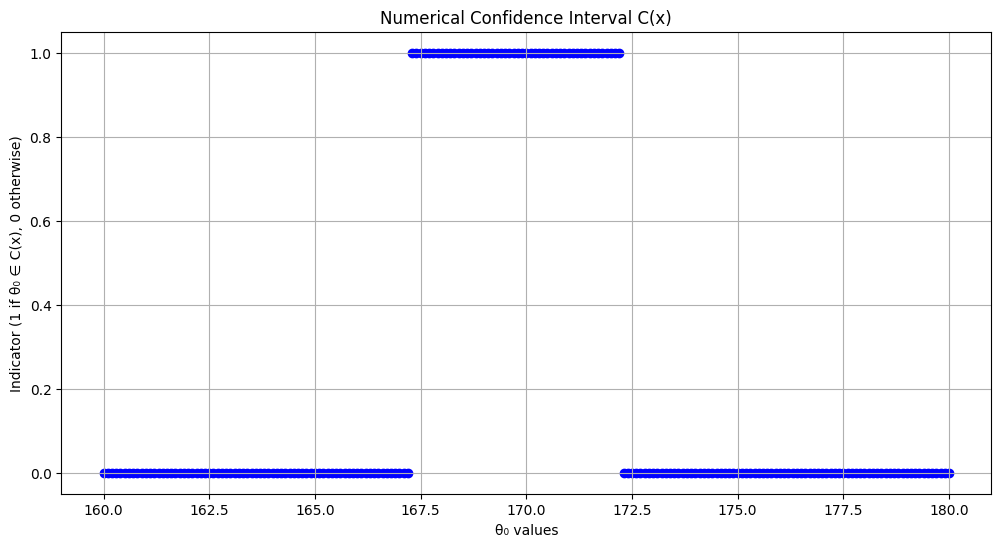

Analytical Confidence Interval: [167.35, 172.15]
Comparison of Confidence Intervals:
Numerical C(x): [167.30, 172.20]
Analytical C(x): [167.35, 172.15]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(2024)

# Parameters
sigma_squared = 6
sigma = np.sqrt(sigma_squared)
n = 4
alpha = 0.05
M = 1000  # Number of simulations

# Simulate your sample x once (since the data is given)
# Using the data from part (c)
x = np.array([178, 161, 168, 172])
x_bar = np.mean(x)

# Grid of θ₀ values
T_values = np.arange(160, 180.1, 0.1)
vc = []

# For each θ₀ in the grid
for theta_0 in T_values:
    # Step 1: Simulate M samples to approximate the distribution of T(X) under H₀
    T_m = []
    for _ in range(M):
        # Simulate data under H₀: θ = θ₀
        x_m = np.random.normal(theta_0, sigma, n)
        # Compute T(x^m; θ₀)
        x_bar_m = np.mean(x_m)
        T_m_value = (n / sigma_squared) * (x_bar_m - theta_0) ** 2
        T_m.append(T_m_value)
    # Determine c_alpha(θ₀) as the 95th percentile
    c_alpha_theta = np.percentile(T_m, 95)
    
    # Step 2: Compute T(x; θ₀) for the actual data
    T_x_theta = (n / sigma_squared) * (x_bar - theta_0) ** 2
    
    # Record 1 if θ₀ ∈ C(x), else 0
    if T_x_theta < c_alpha_theta:
        vc.append(1)
    else:
        vc.append(0)

# Determine the numerical confidence interval from vc
theta_in_Cx = T_values[np.array(vc) == 1]
if len(theta_in_Cx) > 0:
    numerical_Cx = [theta_in_Cx.min(), theta_in_Cx.max()]
    print("Numerical Confidence Interval C(x): [{:.2f}, {:.2f}]".format(numerical_Cx[0], numerical_Cx[1]))
else:
    print("No values of θ₀ are included in the numerical confidence interval C(x).")

# Plotting C(x)
plt.figure(figsize=(12, 6))
plt.scatter(T_values, vc, c='blue', marker='o')
plt.title('Numerical Confidence Interval C(x)')
plt.xlabel('θ₀ values')
plt.ylabel('Indicator (1 if θ₀ ∈ C(x), 0 otherwise)')
plt.grid(True)
plt.show()

# Analytical Confidence Interval for comparison
from scipy.stats import chi2

c_alpha = chi2.ppf(1 - alpha, df=1)
margin = np.sqrt((c_alpha * sigma_squared) / n)
analytical_Cx = [x_bar - margin, x_bar + margin]

print("Analytical Confidence Interval: [{:.2f}, {:.2f}]".format(analytical_Cx[0], analytical_Cx[1]))

# Compare numerical and analytical confidence intervals
print("Comparison of Confidence Intervals:")
print("Numerical C(x): [{:.2f}, {:.2f}]".format(numerical_Cx[0], numerical_Cx[1]))
print("Analytical C(x): [{:.2f}, {:.2f}]".format(analytical_Cx[0], analytical_Cx[1]))


Numerical Confidence Interval: [173.9000, 178.6000]
Confidence Interval (Analytical): [173.8567, 178.6576]


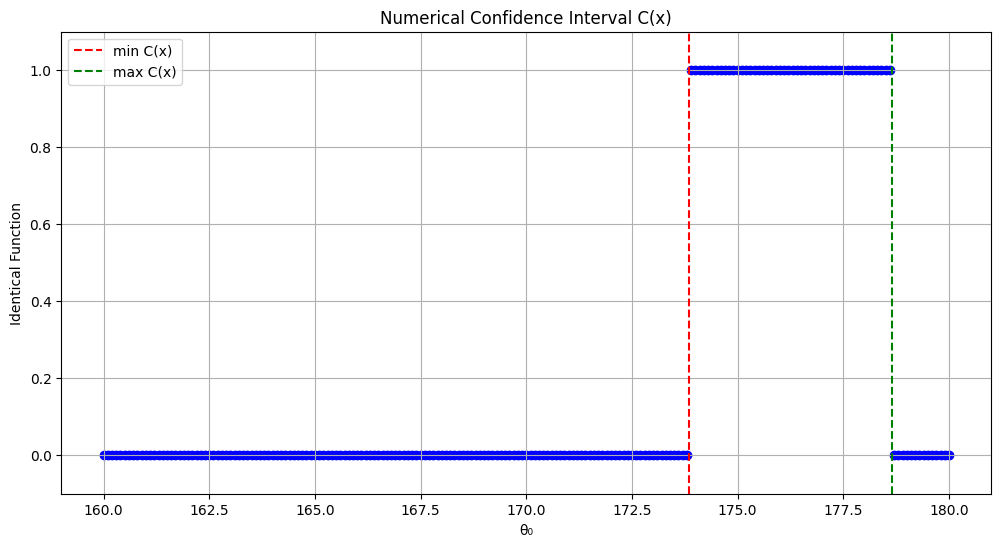

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(2024)

# 参数设置
M = 1000  # 模拟次数
alpha = 0.05  # 显著性水平
n = 4  # 样本量
sigma_squared = 6  # 已知方差
sigma = np.sqrt(sigma_squared)
theta_values = np.arange(160, 180.1, 0.1)  # θ₀ 的取值范围
vc = np.zeros(len(theta_values))  # 用于记录结果的向量

# 生成样本 x
theta_true = 175  # 真正的 θ 值
x = np.random.normal(theta_true, sigma, n)
x_bar = np.mean(x)

# 主循环：对每个 θ₀ 进行计算
for idx, theta_0 in enumerate(theta_values):
    # 第1步：模拟 M 个样本 x^m ~ N(θ₀, σ²)
    T_values = []
    for _ in range(M):
        x_m = np.random.normal(theta_0, sigma, n)
        x_bar_m = np.mean(x_m)
        # 计算检验统计量 T(x^m)
        T_m = (n / sigma_squared) * (x_bar_m - theta_0) ** 2
        T_values.append(T_m)
    
    # 第2步：排序并找到临界值 c_alpha(θ₀)
    T_values_sorted = np.sort(T_values)
    c_alpha_theta = T_values_sorted[int(M * (1 - alpha))]
    # 或者使用百分位数函数
    # c_alpha_theta = np.percentile(T_values, 100 * (1 - alpha))
    
    # 第5步：计算样本 x 对应的检验统计量 T(x; θ₀)
    T_x_theta = (n / sigma_squared) * (x_bar - theta_0) ** 2
    
    # 判断 θ₀ 是否在置信区间内
    if T_x_theta < c_alpha_theta:
        vc[idx] = 1  # θ₀ 在置信区间内
    else:
        vc[idx] = 0  # θ₀ 不在置信区间内

numerical_theta_values_in_CI = theta_values[vc == 1]
numerical_CI_lower = numerical_theta_values_in_CI.min()
numerical_CI_upper = numerical_theta_values_in_CI.max()
print(f"Numerical Confidence Interval: [{numerical_CI_lower:.4f}, {numerical_CI_upper:.4f}]")

# 绘制置信区间 C(x)
plt.figure(figsize=(12, 6))
plt.scatter(theta_values, vc, color='blue', marker='o')
plt.xlabel('θ₀')
plt.ylabel('Identical Function')
plt.title('Numerical Confidence Interval C(x)')
plt.ylim(-0.1, 1.1)
plt.grid(True)

# 计算解析解的置信区间
z_alpha_over_2 = norm.ppf(1 - alpha / 2)
ci_lower = x_bar - z_alpha_over_2 * sigma / np.sqrt(n)
ci_upper = x_bar + z_alpha_over_2 * sigma / np.sqrt(n)
print(f"Confidence Interval (Analytical): [{ci_lower:.4f}, {ci_upper:.4f}]")

# 在图中添加解析置信区间的边界线
plt.axvline(ci_lower, color='red', linestyle='--', label='min C(x)')
plt.axvline(ci_upper, color='green', linestyle='--', label='max C(x)')
plt.legend()
plt.show()
